In [41]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Lesson 9

1) The tips.csv dataset contains data on tips collected from a restaurant.

    a. Find the mean tip broken down by sex. On one plot, build a histogram of tips for males overlaid with a histogram of tips for females. Discuss what you found.

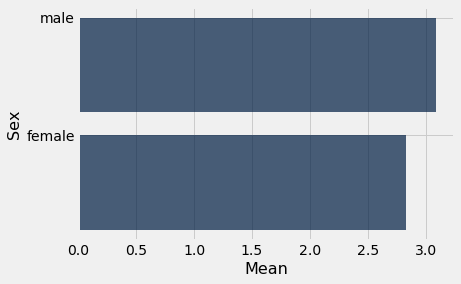

In [42]:
tips = Table.read_table("tips.csv")
female_tips = tips.where('sex', are.equal_to('Female')).column('tip')
mean_female = np.mean(female_tips)
male_tips = tips.where('sex', are.equal_to('Male')).column('tip')
mean_male = np.mean(male_tips)
sex = make_array('male', 'female')
mean = make_array(mean_male, mean_female)
mean_table = Table().with_columns("Sex", sex, "Mean", mean)
mean_table.barh(0,1)

From the bar graph it looks as though the male, on average, tips more thenthe female, on average.

b. Repeat part a, but broken down by time.

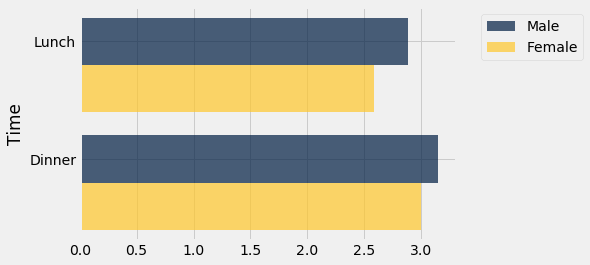

In [43]:
female_dinner_tips = tips.where('sex', are.equal_to('Female')).where('time', are.equal_to('Dinner')).column('tip')
female_lunch_tips = tips.where('sex', are.equal_to('Female')).where('time', are.equal_to('Lunch')).column('tip')
mean_dinner_f = np.mean(female_dinner_tips)
mean_lunch_f = np.mean(female_lunch_tips)

male_dinner_tips = tips.where('sex', are.equal_to('Male')).where('time', are.equal_to('Dinner')).column('tip')
male_lunch_tips = tips.where('sex', are.equal_to('Male')).where('time', are.equal_to('Lunch')).column('tip')
mean_dinner_m = np.mean(male_dinner_tips)
mean_lunch_m = np.mean(male_lunch_tips)

time = make_array('Lunch', 'Dinner')
mean_male = make_array(mean_lunch_m, mean_dinner_m)
mean_female = make_array(mean_lunch_f, mean_dinner_f)
mean_table = Table().with_columns("Time", time, "Male", mean_male, "Female", mean_female)
mean_table.barh(0)


From the graph it seems that males, on average, do give a higher tip but both genders spend more at dinner.

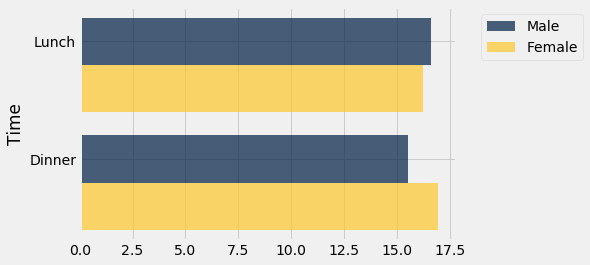

In [44]:
female_dinner_tips = (tips.where('sex', are.equal_to('Female')).where('time', are.equal_to('Dinner')).column('tip') / tips.where('sex', are.equal_to('Female')).where('time', are.equal_to('Dinner')).column('total_bill')) * 100
female_lunch_tips = (tips.where('sex', are.equal_to('Female')).where('time', are.equal_to('Lunch')).column('tip') / tips.where('sex', are.equal_to('Female')).where('time', are.equal_to('Lunch')).column('total_bill')) * 100
mean_dinner_f = np.mean(female_dinner_tips)
mean_lunch_f = np.mean(female_lunch_tips)

male_dinner_tips = (tips.where('sex', are.equal_to('Male')).where('time', are.equal_to('Dinner')).column('tip') / tips.where('sex', are.equal_to('Male')).where('time', are.equal_to('Dinner')).column('total_bill')) * 100
male_lunch_tips = (tips.where('sex', are.equal_to('Male')).where('time', are.equal_to('Lunch')).column('tip') / tips.where('sex', are.equal_to('Male')).where('time', are.equal_to('Lunch')).column('total_bill')) * 100
mean_dinner_m = np.mean(male_dinner_tips)
mean_lunch_m = np.mean(male_lunch_tips)

time = make_array('Lunch', 'Dinner')
mean_male = make_array(mean_lunch_m, mean_dinner_m)
mean_female = make_array(mean_lunch_f, mean_dinner_f)
mean_table = Table().with_columns("Time", time, "Male", mean_male, "Female", mean_female)
mean_table.barh(0)


Looking at percent being tiped females actually tip more percntage wise at dinner and closer to males at lunch then their average shows from the previous two graphs. This most likly means that males have larger bills and therefore have larger tips

2) Create a function called weekday_to_num. This function inputs a string denoting day of
the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues =
2, … Sun = 7).

In [96]:
weekdays = ('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun')
day = make_array('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun')
def weekday_to_num(day):
    return weekdays.index(day) + 1
    

3) Apply this function to the day column of tips and include the result as a new column in
tips, called weekday_num.

In [99]:
# weekday_num = weekday_to_num(tips.column('day'))
# tips_daynum = tips.with_column('weekday_num', weekday_num)
# tips_daynum
tips.with_column('weekday_num', tips.apply(weekday_to_num,'day'))


total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


4) Create a function called est_tip. The goal of this function is to predict tip amount
based on the value of the bill (total_bill). To do this, we will look at “nearby” values
(i.e. tip, where the value of total_bill is near the value of interest.) For example, if
we want to predict the tip for total bill value of $20, we will simply look at all total bills
near $20 and average the tip amount. The input of est_tip should be the total bill
amount and the window, or the difference in total bill we would consider “nearby”. For
example, for a window of $1, we will look at all bills totaling $19 thru $21. The output of
this function will be the predicted tip amount.

In [90]:
def est_tip(total_bill, window=5):
    nearby = tips.where('total_bill', are.between(total_bill - window, total_bill + window))
    return nearby.column('tip').mean().round(2)
est_tip(20, 1)

3.14

5) Apply this function to the total_bill column of tips and include the result as a new
column in tips. Build a scatterplot showing predicted tip amount overlaid with actual tip
amount.

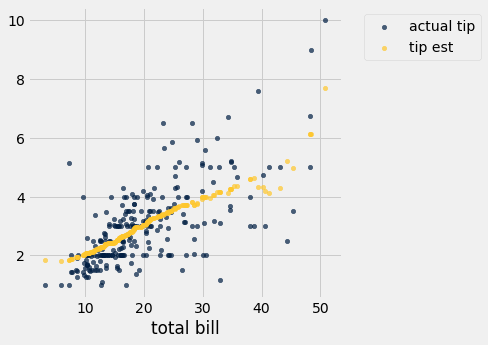

In [91]:
total_bill = tips.column('total_bill')
tip = tips.column('tip')
tips_with_est = Table().with_columns('total bill', total_bill, 'actual tip', tip, 'tip est', tips.apply(est_tip, 'total_bill'))

tips_with_est.scatter(0)

Note that the higher the window size for the estimate tip the closer to a linear pattern, if the window is small then the larger bills will have an estimated tip of what ever the customer who paid the bill had actually paid due to lack of data